## The Design and Application of A-B Testing

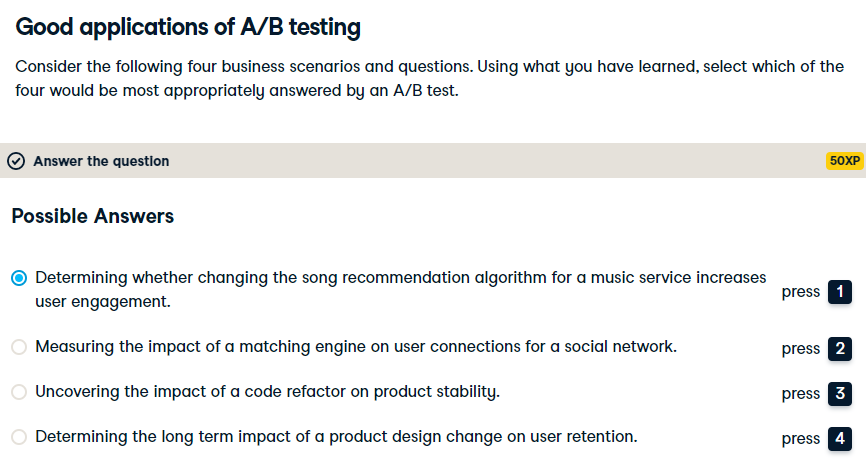

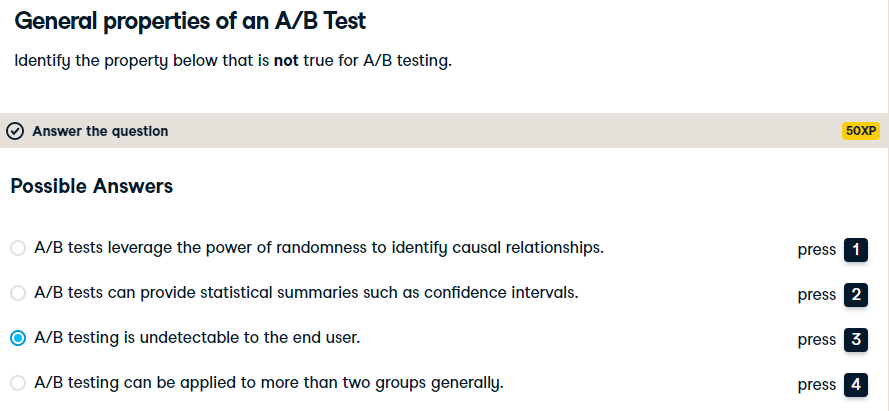

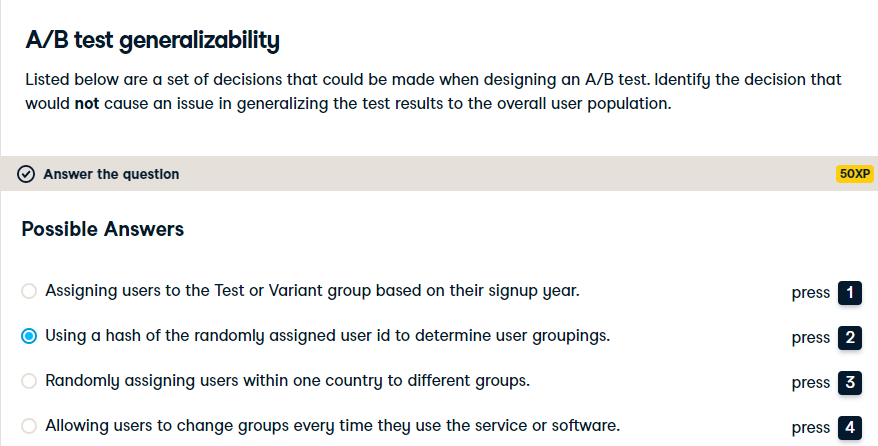

## Initial A/B test design

#### Experimental units: Revenue per user day

We are going to check what happens when we add a consumable paywall to our app. A paywall is a feature of a website or other technology that requires payment from users in order to access additional content or services.

Here, you'll practice calculating experimental units and baseline values related to our consumable paywall. Both measure revenue only among users who viewed a paywall. Your job is to calculate revenue per user-day, with user-day as the experimental unit.

The purchase_data dataset has been loaded for you.

**Instructions**

- Extract the 'day' value from the date timestamp as you saw in the video: Using .date.dt.floor('d').

- To make the calculations easier, replace the NaN purchase_data.price values with 0 by using the np.where() method.

- Finally, find the mean amount paid per user-day among paywall viewers. To do this, you need to first aggregate the data by 'uid' and 'date', which has been done for you.

In [11]:
purchase_data = pd.read_csv('purchase_dataset.csv')
purchase_data.head(1)

<IPython.core.display.Javascript object>

,date,uid,sku,price
0,2017-07-10,41195147.0,sku_three_499,499.0


In [12]:
purchase_data.date.dtype

dtype('O')

In [13]:
purchase_data.date = pd.to_datetime(purchase_data.date, errors='coerce')

<IPython.core.display.Javascript object>

In [14]:
purchase_data.date.dtype

dtype('<M8[ns]')

In [15]:
# Extract the 'day'; value from the timestamp
purchase_data.date = purchase_data.date.dt.floor('d')

# Replace the NaN price values with 0 
purchase_data.price = np.where(np.isnan(purchase_data.price), 0, purchase_data.price)

# Aggregate the data by 'uid' & 'date'
purchase_data_agg = purchase_data.groupby(by=['uid', 'date'], as_index=False)
revenue_user_day = purchase_data_agg.sum()

# Calculate the final average
revenue_user_day = revenue_user_day.price.mean()
print(revenue_user_day)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

407.95033407572384


Awesome work! Values such as these will provide helpful context as you prepare your experiment. Now lets learn how to run an A/B test.

#### Conversion rate sensitivities

To mix things up, we will spend the next few exercises working with the conversion rate metric we explored in Chapter One. Specifically you will work to examine what that value becomes under different percentage lifts and look at how many more conversions per day this change would result in. First you will find the average number of paywall views and purchases that were made per day in our observed sample. Good luck!

**Instructions**

- Merge the paywall_views with demographics_data tables using an 'inner' join. This will limit the result to only include users who appear in both and will remove everyone who did not view a paywall, which is what we want in this scenario.

- Group purchase_data by 'date'. The result of this is then aggregated for you by summing over the purchase field to find the total number of purchases and counting over it to find the total number of paywall views.

- Average each of the resulting sum and count fields to find the average number of purchases and paywall views per day.

- The results reflect a sample of 0.1% of our overall population for ease of use. Multiply each of daily_purchases and daily_paywall_views by 1000 so our result reflects the magnitude change if we had been observing the entire population.

In [17]:
demographics_data = pd.read_csv('demographics_dataset.csv')
demographics_data.head(1)

<IPython.core.display.Javascript object>

,uid,reg_date,device,gender,country,age
0,54030035.0,2017-06-29T00:00:00Z,and,M,USA,19


In [18]:
paywall_views = pd.read_csv('paywall_views_dataset.csv')
paywall_views.head(1)

<IPython.core.display.Javascript object>

,uid,reg_date,device,gender,country,age
0,52774929,2018-03-07T00:00:00Z,and,F,FRA,27.0


In [19]:
# Merge and group the datasets
purchase_data = demographics_data.merge(paywall_views,  how='inner', on=['uid'])
purchase_data.date = purchase_data.date.dt.floor('d')

# Group and aggregate our combined dataset 
daily_purchase_data = purchase_data.groupby(by=['date'], as_index=False)
daily_purchase_data = daily_purchase_data.agg({'purchase': ['sum', 'count']})

# Find the mean of each field and then multiply by 1000 to scale the result
daily_purchases = daily_purchase_data.purchase['sum'].mean()
daily_paywall_views = daily_purchase_data.purchase['count'].mean()
daily_purchases = daily_purchases * 1000
daily_paywall_views = daily_paywall_views * 1000

print(daily_purchases)
print(daily_paywall_views)

AttributeError: 'DataFrame' object has no attribute 'date'